

# 项目：调查TMDB电影数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
    TMDb电影数据集共有数据10866行，21列（电影名称、导演、演职人员、预算、收入等）；数据类型包括int、str、float等；存在NULL的列共9列，NULL值13434个；冗余行数1行。



In [71]:
#导入需要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline



In [72]:
def load_data():
    df = pd.read_csv('tmdb-movies.csv')
    return df

<a id='wrangling'></a>
## 数据整理



### 常规属性

In [74]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = load_data()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


通过查看数据前5行，大体了解数据结构。

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

查看数据简略信息，包括列名称、非NULL值数量以及数据类型。

In [243]:
df['release_date'][:5]

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

In [13]:
type(df['release_year'][1])

numpy.int64

具体查看各列数据类型

In [14]:
df.shape

(10866, 21)

查看数据维度（行列数）

In [15]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

统计数据各列NULL值数量

In [16]:
sum(df.duplicated())

1

计算数据集冗余行数

**研究问题**
1. 通过TMDb电影数据集，探究电影时长与预算（不考虑通货膨胀）之间的关系。
2. 探究1995-2015年间发布的电影中，每年电影预算与收入在是否考虑通货膨胀不同情况下的变化趋势。
3. 探究2005-2015年间，收入（考虑通货膨胀情况）最高的十大电影都有哪些特征？



### 数据清理（处理数据缺失、数据冗余、结构问题。）

In [76]:
df.drop_duplicates(inplace=True)

原地删除冗余行

In [77]:
df.drop(columns=['original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords','overview', 'release_year'], inplace=True)
df.shape

(10865, 13)

删除原标题（original_title）、演职人员（cast），主页网址（homepage）等8个与此次数据分析无关列。

In [78]:
df.dropna(subset=['genres', 'production_companies'],inplace=True)

原地删除类型(genres)、制作公司(production_companies)中含有NULL值的行。

In [79]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'][:5]

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

将电影发布日期列（release_date）转换成datetime格式。

In [80]:
df['popularity'] = df['popularity'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['vote_average'] = df['vote_average'].astype(int)
#检测转换格式是否成功
type(df['vote_average'][1])

numpy.int32

为了方便统计，这里我们将声望（popularity）、收入（revenue）以及平均投票数（vote_average）数据类型转换为int。

In [22]:
df['genres'] = df['genres'].str.split(pat="|", expand=False).apply(lambda x: ','.join(map(str, x)))
type(df['genres'][1])

str

In [81]:
df['production_companies'] = df['production_companies'].str.split(pat="|", expand=False).apply(lambda x: ','.join(map(str, x)))
type(df['production_companies'][1])

str

分别将电影类型（gebres）、制作公司（production_companies）列中由“|”分割的数据转换为“,”分割的字符串。

In [82]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 10865
Data columns (total 13 columns):
id                      9826 non-null int64
imdb_id                 9822 non-null object
popularity              9826 non-null int32
budget                  9826 non-null int64
revenue                 9826 non-null int32
runtime                 9826 non-null int64
genres                  9826 non-null object
production_companies    9826 non-null object
release_date            9826 non-null datetime64[ns]
vote_count              9826 non-null int64
vote_average            9826 non-null int32
budget_adj              9826 non-null float64
revenue_adj             9826 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(3), int64(4), object(3)
memory usage: 1.2+ MB


<a id='eda'></a>
## 探索性数据分析



### 研究问题 1（通过TMDb电影数据集，探究电影时长与预算（不考虑通货膨胀）之间的关系。 ）

In [83]:
df['runtime'].describe()

count    9826.000000
mean      102.674944
std        28.202856
min         0.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

In [84]:
df['budget'].describe()

count    9.826000e+03
mean     1.609320e+07
std      3.214331e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.250000e+05
75%      1.900000e+07
max      4.250000e+08
Name: budget, dtype: float64

分别对电影类型、预算进行有效描述性统计。  
**通过对电影时长统计的结果**我们可以看出所有电影的平均时长约为102.67min，第一四分位数为90，第三个四分位数为112，其中时长最短的为0min,最长为877min;  
**通过对预算统计的结果**我们可以看出所有电影的平均预算约为$1.609320e+07，第一四分位数为0.000000e+00，第三个四分位数为1.900000e+07，其中预算最多的达到$4.250000e+08，最少的$0.000000e+00。

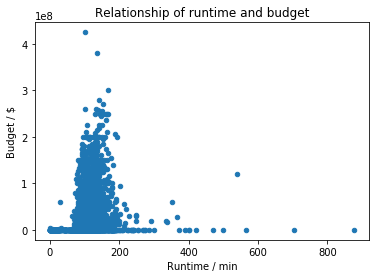

In [85]:
#对电影时长和预算统计结果进行可视化
df.plot.scatter(x=['runtime'], y=['budget'])
plt.title('Relationship of runtime and budget')
plt.xlabel('Runtime / min')
plt.ylabel('Budget / $');

由上图我们可以看出电影时长在0-200min内的电影比较集中，且存在一些异常值。

### 研究问题 2（探究1995-2015年间发布的电影中，每年电影预算与收入在是否考虑通货膨胀不同情况下的变化趋势。）

In [86]:
#将date设置为index
df = df.set_index(df['release_date'])

In [87]:
#选取1995-2015年的数据
df1 = df['1995':'2015']

In [88]:
#对1995-2015年的数据按照年份进行统计
df2 = df1.resample('AS').mean()

In [89]:
#对不考虑通货膨胀情况下的预算和收入进行描述性统计
print(df['budget'].describe())
print(df['revenue'].describe())

count    9.826000e+03
mean     1.609320e+07
std      3.214331e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.250000e+05
75%      1.900000e+07
max      4.250000e+08
Name: budget, dtype: float64
count    9.826000e+03
mean     4.355215e+07
std      1.201665e+08
min     -1.513461e+09
25%      0.000000e+00
50%      0.000000e+00
75%      3.052438e+07
max      2.068178e+09
Name: revenue, dtype: float64


**通过对预算统计的结果**我们可以看出所有电影的平均预算约为$1.609320e+07，第一四分位数为0.000000e+00，第三个四分位数为1.900000e+07，其中预算最多的达到$4.250000e+08，最少的$0.000000e+00。  

**通过对收入统计结果**我们可以看出所有电影的平均收入约为$4.355215e+07，第一四分位数为0.000000e+00，第三个四分位数为3.052438e+07，其中预算最多的达到$2.068178e+09，最少的$-1.513461e+09。 

In [90]:
##对考虑通货膨胀情况下的预算和收入进行描述性统计
print(df['budget_adj'].describe())
print(df['revenue_adj'].describe())

count    9.826000e+03
mean     1.931209e+07
std      3.559582e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.962531e+05
75%      2.432644e+07
max      4.250000e+08
Name: budget_adj, dtype: float64
count    9.826000e+03
mean     5.674069e+07
std      1.510917e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.248459e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64


**通过对预算统计的结果**我们可以看出所有电影的平均预算约为$1.931209e+07，第一四分位数为0.000000e+00，第三个四分位数为2.432644e+07，其中预算最多的达到$4.250000e+08，最少的$0.000000e+00。  

**通过对收入统计结果**我们可以看出所有电影的平均收入约为$5.674069e+07，第一四分位数为0.000000e+00，第三个四分位数为4.248459e+07，其中预算最多的达到$2.827124e+09，最少的$0.000000e+00。 

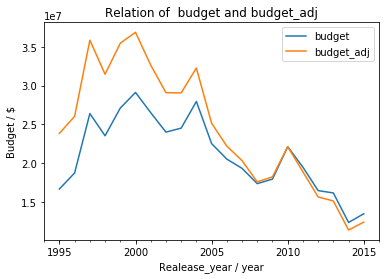

In [91]:
#对是否考虑通货膨胀情况下的预算统计结果进行可视化
df2.plot( y=['budget','budget_adj'])
plt.title('Relation of  budget and budget_adj')
plt.xlabel('Realease_year / year')
plt.ylabel('Budget / $');

由上图我们可以看出1995-2005年间，在考虑通货膨胀的情况下，电影预算要高于不考虑通货膨胀情况下的预算，但是两者的趋势趋于一致，没有很大差别。

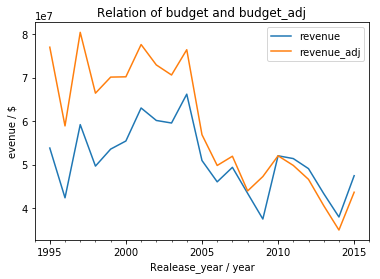

In [92]:
#对是否考虑通货膨胀情况下的收入统计结果进行可视化
df2.plot( y=['revenue','revenue_adj'])
plt.title('Relation of budget and budget_adj')
plt.xlabel('Realease_year / year')
plt.ylabel('evenue / $');

由上图我们可以看出1995-2005年间，在考虑通货膨胀的情况下，电影收入要高于不考虑通货膨胀情况下的收入，但是两者的趋势趋于一致，也没有很大差别。

### 研究问题 3（探究2005-2015年间，收入（考虑通货膨胀情况）最高的十大电影都有哪些特征？）

In [93]:
#整理2005-2015年间，收入（考虑通货膨胀情况）最高的十大电影
df_0515 = df['2005':'2015']
df_0515 = df_0515.sort_values(['revenue_adj'],ascending = False)[:10]

In [477]:
df_0515

,id,imdb_id,popularity,budget,revenue,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
release_date,,,,,,,,,,,,,
2009-12-10,19995,tt0499549,9,237000000,-1513461449,162,"Action,Adventure,Fantasy,Science Fiction","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,8458,7,2.408869e+08,2.827124e+09
2015-12-15,140607,tt2488496,11,200000000,2068178225,136,"Action,Adventure,Science Fiction,Fantasy","Lucasfilm,Truenorth Productions,Bad Robot",2015-12-15,5292,7,1.839999e+08,1.902723e+09
2012-04-25,24428,tt0848228,7,220000000,1519557910,143,"Science Fiction,Action,Adventure",Marvel Studios,2012-04-25,8903,7,2.089437e+08,1.443191e+09
2015-06-09,135397,tt0369610,32,150000000,1513528810,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",2015-06-09,5562,6,1.379999e+08,1.392446e+09
2015-04-01,168259,tt2820852,9,190000000,1506249360,137,"Action,Crime,Thriller","Universal Pictures,Original Film,Media Rights ...",2015-04-01,2947,7,1.747999e+08,1.385749e+09
2015-04-22,99861,tt2395427,5,280000000,1405035767,141,"Action,Adventure,Science Fiction","Marvel Studios,Prime Focus,Revolution Sun Studios",2015-04-22,4304,7,2.575999e+08,1.292632e+09
2011-07-07,12445,tt1201607,5,125000000,1327817822,130,"Adventure,Family,Fantasy","Warner Bros.,Heyday Films,Moving Picture Compa...",2011-07-07,3750,7,1.211748e+08,1.287184e+09
2013-11-27,109445,tt2294629,6,150000000,1274219009,102,"Animation,Adventure,Family","Walt Disney Pictures,Walt Disney Animation Stu...",2013-11-27,3369,7,1.404050e+08,1.192711e+09
2006-06-20,58,tt0383574,4,200000000,1065659812,151,"Adventure,Fantasy,Action","Walt Disney Pictures,Jerry Bruckheimer Films,S...",2006-06-20,3181,6,2.163338e+08,1.152691e+09


In [94]:
df_0515['genres'].str.split(',', expand=True)
df_0515['genres'].str.split(',', expand=True).stack()#将“genres”列分成多行
tmp = df_0515['genres'].str.split(',', expand=True).stack().reset_index(level=1,drop=True).rename('genre')#将索引level删除
df_0515 = df_0515.join(tmp)

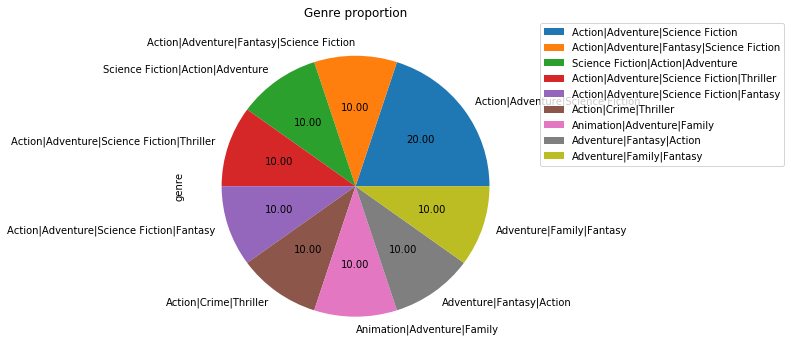

In [95]:
#对'genre'列统计数据进行可视化
df_0515['genre'].value_counts().plot.pie(subplots=True, figsize=(6, 6),  autopct="%.2f")
plt.title('Genre proportion')
plt.legend(loc='upper right')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.);#调整图例位置

由上图我们可以看出2005-2015年间，收入（考虑通货膨胀情况）最高的十大电影中，共有8种电影类别，其中最受欢迎的前三种电影分别是冒险类、动作类以及科幻类，差强人意的是动画类电影。

In [96]:
df_0515['production_companies'].str.split(',', expand=True)
df_0515['production_companies'].str.split(',', expand=True).stack()#将'production_companies'列分成多行
tmp = df_0515['production_companies'].str.split(',', expand=True).stack().reset_index(level=1,drop=True).rename('companies')#删除索引level=1
df_0515 = df_0515.join(tmp)

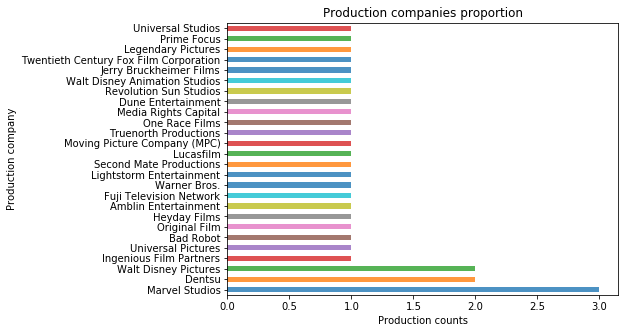

In [104]:
#对'companies'列进行可视化
df_0515['companies'].value_counts().plot(kind='barh', stacked=True, alpha=0.8, figsize=(7,5))
plt.title('Production companies proportion')
plt.xlabel('Production counts')
plt.ylabel('Production company');

由上图我们可以看出参与这几部电影制作次数最多的前三个公司分别为：Marvel Studios、Densn、Walt Disney Pictures。

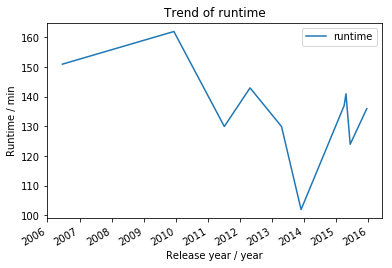

In [44]:
#对'runtime'进行可视化
df_0515.plot( y = ['runtime'])
plt.title('Trend of runtime')
plt.xlabel('Release year / year')
plt.ylabel('Runtime / min');

由上图我们可以看出收入最高的十大电影的电影时长大多集中在120分钟左右。

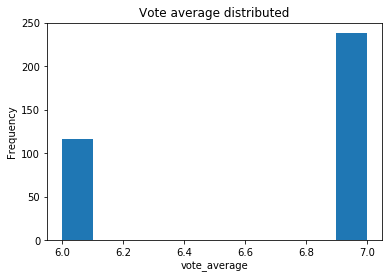

In [587]:
##对'vote_average'进行可视化
df_0515['vote_average'].plot.hist()
plt.title('Vote average distributed')
plt.xlabel('vote_average');

由于上图我们可以看出收入最高的十大电影的平均票数集中在6、7。

<a id='conclusions'></a>
## 结论


1. 通过TMDb电影数据集，探究电影时长与预算（不考虑通货膨胀）之间的关系。  
答：由数据可视化结果我们可以得出以下结论：①电影时长在0-200min内的电影预算比较集中；②可视化中不难发现有个别异常值的出现，这可能是数据统计有误或者其他原因造成的。
  
2. 探究1995-2015年间发布的电影中，每年电影预算与收入在是否考虑通货膨胀不同情况下的变化趋势。  
答：由数据可视化我们可以得出以下结论：①总体来看，1995-2015年间发布的电影中，在考虑通货膨胀情况前后，电影预算与收入的变化趋势基本保持一致；②考虑通货膨胀的情况下，电影预算和收入均高于没有考虑通货膨胀情况下的电影预算和收入。
  
3. 探究2005-2015年间，收入（考虑通货膨胀情况）最高的十大电影都有哪些特征？  
答：由数据可视化我们可以得出以下结论：2005-2015年间，收入（考虑通货膨胀情况）最高的十大电影有以下特征①在8种电影类别中，最受欢迎的前三种电影分别是冒险类、动作类以及科幻类，差强人意的是动画类电影；②参与这几部电影制作次数最多的前三个公司分别为：Marvel Studios、Densn、Walt Disney Pictures；③这些电影时长大多集中在120分钟左右；④平均票数集中在6、7。

**声明：**  
由于数据集中存在缺失值，且不了解这些数据缺失原因，存在很大的局限性。故本报告结论仅供参考！

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])